In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [3]:
#Create a path to where your data is stored.
path= r'C:\Users\solom\Downloads\Machine Learning- Project'

In [4]:

df_pleasant = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [5]:
df_weather = pd.read_csv(os.path.join(path, 'Manipulated Data', 'Weather_Data_Scaled.csv'), index_col = False)

In [6]:
df_pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df_weather.head()

,Unnamed: 0,ID,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [8]:
columns= ['DATE','BUDAPEST_pleasant_weather','HEATHROW_pleasant_weather','OSLO_pleasant_weather']
df2= df_pleasant[columns]
df2

,DATE,BUDAPEST_pleasant_weather,HEATHROW_pleasant_weather,OSLO_pleasant_weather
0,19600101,0,0,0
1,19600102,0,0,0
2,19600103,0,0,0
3,19600104,0,0,0
4,19600105,0,0,0
...,...,...,...,...
22945,20221027,0,0,0
22946,20221028,0,0,0
22947,20221029,0,0,0
22948,20221030,0,0,0


In [9]:
columns2= ['DATE','BUDAPEST_cloud_cover',	'BUDAPEST_humidity',	'BUDAPEST_pressure',	'BUDAPEST_global_radiation',	'BUDAPEST_precipitation',	'BUDAPEST_sunshine',	'BUDAPEST_temp_mean',	'BUDAPEST_temp_min',	'BUDAPEST_temp_max','HEATHROW_cloud_cover',	'HEATHROW_humidity',	'HEATHROW_pressure',	'HEATHROW_global_radiation',	'HEATHROW_precipitation',	'HEATHROW_snow_depth',	'HEATHROW_sunshine',	'HEATHROW_temp_mean',	'HEATHROW_temp_min',	'HEATHROW_temp_max','OSLO_cloud_cover',	'OSLO_wind_speed',	'OSLO_humidity',	'OSLO_pressure',	'OSLO_global_radiation',	'OSLO_precipitation',	'OSLO_snow_depth',	'OSLO_sunshine',	'OSLO_temp_mean',	'OSLO_temp_min',	'OSLO_temp_max']
df3= df_weather[columns2]
df3

,DATE,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,...,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max
0,19600101,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,...,0.816809,1.544023,-1.142400,-1.067870,1.925426,-0.470091,-1.018677,-0.186575,0.094958,-0.474865
1,19600102,-0.25524,-0.010098,-0.005876,-1.415938,0.371622,-1.344065,-1.110927,-0.878727,-1.341204,...,1.526267,-0.712374,0.190182,-1.067870,-0.455841,-0.470091,-1.018677,-0.368598,-0.033545,-0.582847
2,19600103,-0.25524,-0.010098,-0.005876,-1.278676,-0.344984,-1.195190,-1.063873,-0.838610,-1.116403,...,-0.279627,-0.273630,0.976489,-1.067870,-0.288735,-0.470091,-1.018677,-0.550620,-0.316251,-0.777215
3,19600104,-0.25524,-0.010098,-0.005876,-1.404499,-0.344984,-1.344065,-1.146217,-1.012452,-1.208367,...,0.752313,1.544023,1.059258,-1.067870,0.275250,-0.470091,-1.018677,-0.417137,-0.341951,-0.582847
4,19600105,-0.25524,-0.010098,-0.005876,-1.404499,-0.344984,-1.344065,-1.087400,-0.918844,-1.116403,...,-0.795597,1.418668,-0.198832,-1.057482,0.087255,-0.470091,-1.018677,-0.332193,-0.020694,-0.582847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,-0.25524,-0.010098,-0.005876,-0.009004,-0.021356,-0.004191,-0.005167,-0.009517,-0.002613,...,-1.053582,1.544023,0.190182,-0.008230,-0.017187,-0.470091,-0.996967,0.395898,0.351964,0.183825
22946,20221028,-0.25524,-0.010098,-0.005876,-0.009004,-0.021356,-0.004191,-0.005167,-0.009517,-0.002613,...,-0.795597,1.669379,-0.074679,-0.008230,-0.017187,-0.470091,-1.018677,0.541516,0.737472,0.151430
22947,20221029,-0.25524,-0.010098,-0.005876,-0.009004,-0.021356,-0.004191,-0.005167,-0.009517,-0.002613,...,-0.408619,0.729213,-0.281601,-0.008230,-0.017187,-0.470091,0.457592,0.395898,0.596119,0.421385
22948,20221030,-0.25524,-0.010098,-0.005876,-0.009004,-0.021356,-0.004191,-0.005167,-0.009517,-0.002613,...,-0.989085,1.293312,0.281228,-0.008230,-0.017187,-0.470091,-0.389091,-0.065226,-0.123497,-0.237305


In [10]:
df4= df3.merge(df2, on='DATE')
df4

,DATE,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,...,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,BUDAPEST_pleasant_weather,HEATHROW_pleasant_weather,OSLO_pleasant_weather
0,19600101,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,...,-1.067870,1.925426,-0.470091,-1.018677,-0.186575,0.094958,-0.474865,0,0,0
1,19600102,-0.25524,-0.010098,-0.005876,-1.415938,0.371622,-1.344065,-1.110927,-0.878727,-1.341204,...,-1.067870,-0.455841,-0.470091,-1.018677,-0.368598,-0.033545,-0.582847,0,0,0
2,19600103,-0.25524,-0.010098,-0.005876,-1.278676,-0.344984,-1.195190,-1.063873,-0.838610,-1.116403,...,-1.067870,-0.288735,-0.470091,-1.018677,-0.550620,-0.316251,-0.777215,0,0,0
3,19600104,-0.25524,-0.010098,-0.005876,-1.404499,-0.344984,-1.344065,-1.146217,-1.012452,-1.208367,...,-1.067870,0.275250,-0.470091,-1.018677,-0.417137,-0.341951,-0.582847,0,0,0
4,19600105,-0.25524,-0.010098,-0.005876,-1.404499,-0.344984,-1.344065,-1.087400,-0.918844,-1.116403,...,-1.057482,0.087255,-0.470091,-1.018677,-0.332193,-0.020694,-0.582847,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,-0.25524,-0.010098,-0.005876,-0.009004,-0.021356,-0.004191,-0.005167,-0.009517,-0.002613,...,-0.008230,-0.017187,-0.470091,-0.996967,0.395898,0.351964,0.183825,0,0,0
22946,20221028,-0.25524,-0.010098,-0.005876,-0.009004,-0.021356,-0.004191,-0.005167,-0.009517,-0.002613,...,-0.008230,-0.017187,-0.470091,-1.018677,0.541516,0.737472,0.151430,0,0,0
22947,20221029,-0.25524,-0.010098,-0.005876,-0.009004,-0.021356,-0.004191,-0.005167,-0.009517,-0.002613,...,-0.008230,-0.017187,-0.470091,0.457592,0.395898,0.596119,0.421385,0,0,0
22948,20221030,-0.25524,-0.010098,-0.005876,-0.009004,-0.021356,-0.004191,-0.005167,-0.009517,-0.002613,...,-0.008230,-0.017187,-0.470091,-0.389091,-0.065226,-0.123497,-0.237305,0,0,0


In [11]:
df4.isnull().sum()

DATE                         0
BUDAPEST_cloud_cover         0
BUDAPEST_humidity            0
BUDAPEST_pressure            0
BUDAPEST_global_radiation    0
BUDAPEST_precipitation       0
BUDAPEST_sunshine            0
BUDAPEST_temp_mean           0
BUDAPEST_temp_min            0
BUDAPEST_temp_max            0
HEATHROW_cloud_cover         0
HEATHROW_humidity            0
HEATHROW_pressure            0
HEATHROW_global_radiation    0
HEATHROW_precipitation       0
HEATHROW_snow_depth          0
HEATHROW_sunshine            0
HEATHROW_temp_mean           0
HEATHROW_temp_min            0
HEATHROW_temp_max            0
OSLO_cloud_cover             0
OSLO_wind_speed              0
OSLO_humidity                0
OSLO_pressure                0
OSLO_global_radiation        0
OSLO_precipitation           0
OSLO_snow_depth              0
OSLO_sunshine                0
OSLO_temp_mean               0
OSLO_temp_min                0
OSLO_temp_max                0
BUDAPEST_pleasant_weather    0
HEATHROW

C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


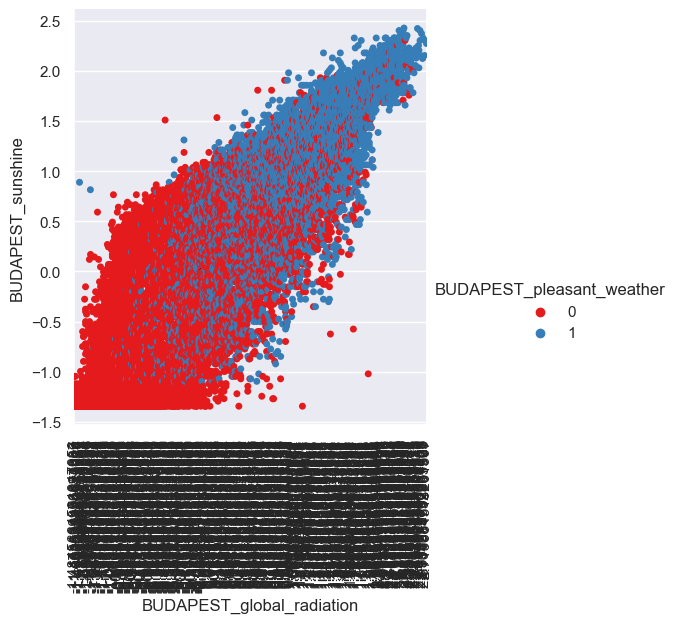

In [12]:
sns.set_theme()
g = sns.catplot(x="BUDAPEST_global_radiation", y="BUDAPEST_sunshine", hue="BUDAPEST_pleasant_weather", palette='Set1', data=df4)
g.set_xticklabels(rotation=90)

C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\solom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

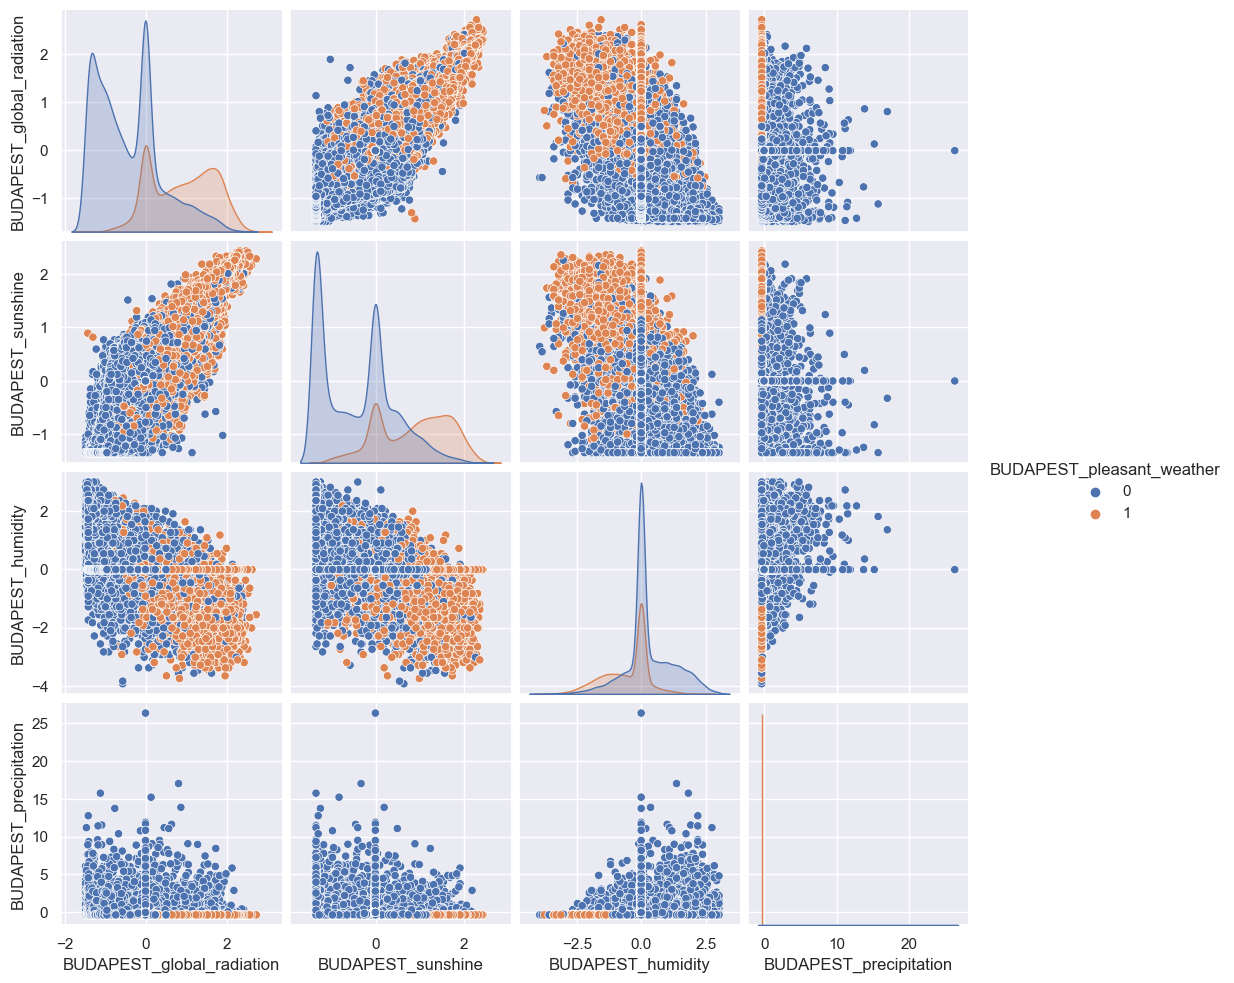

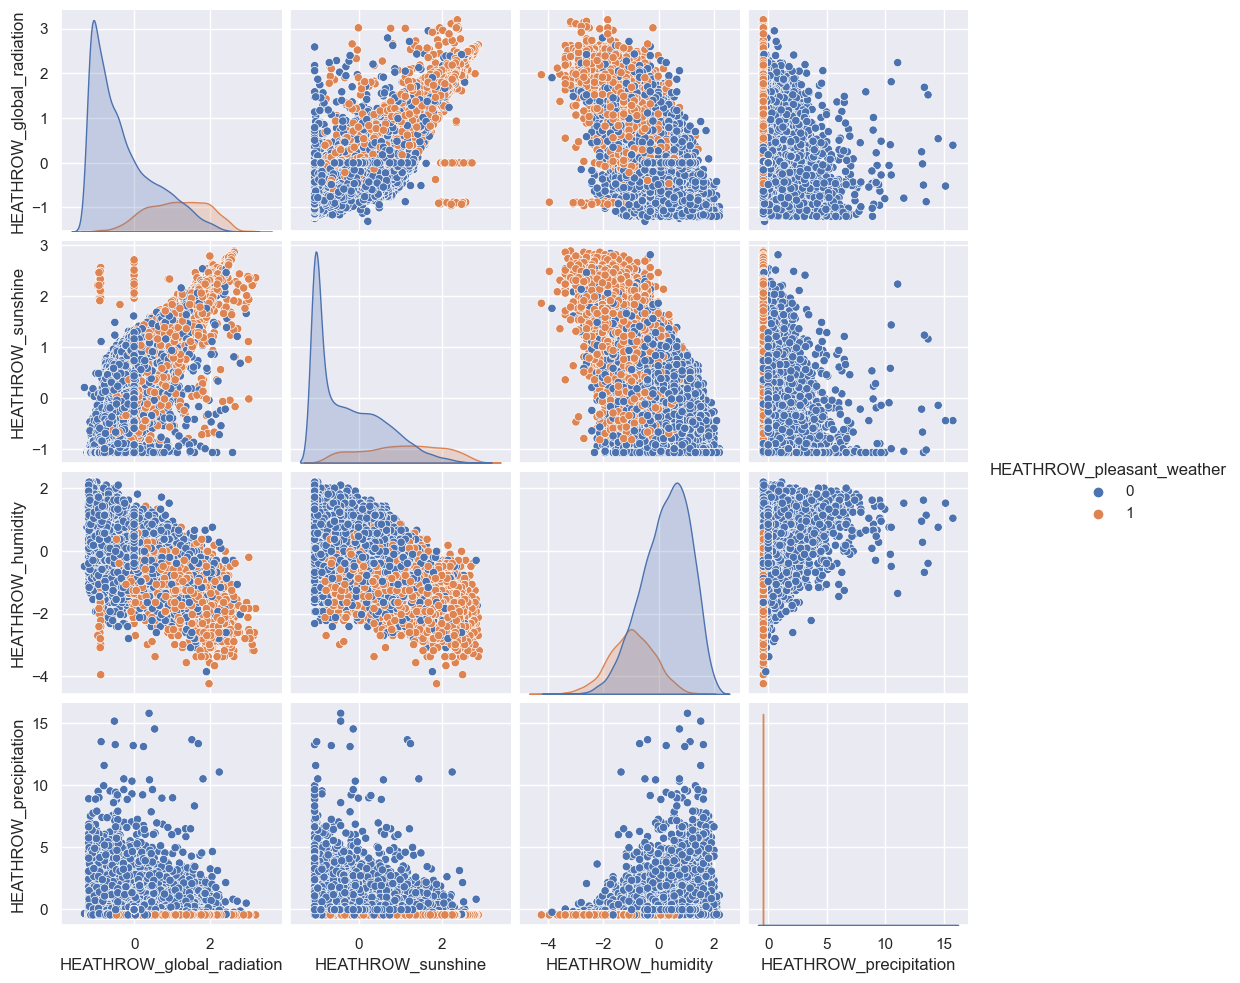

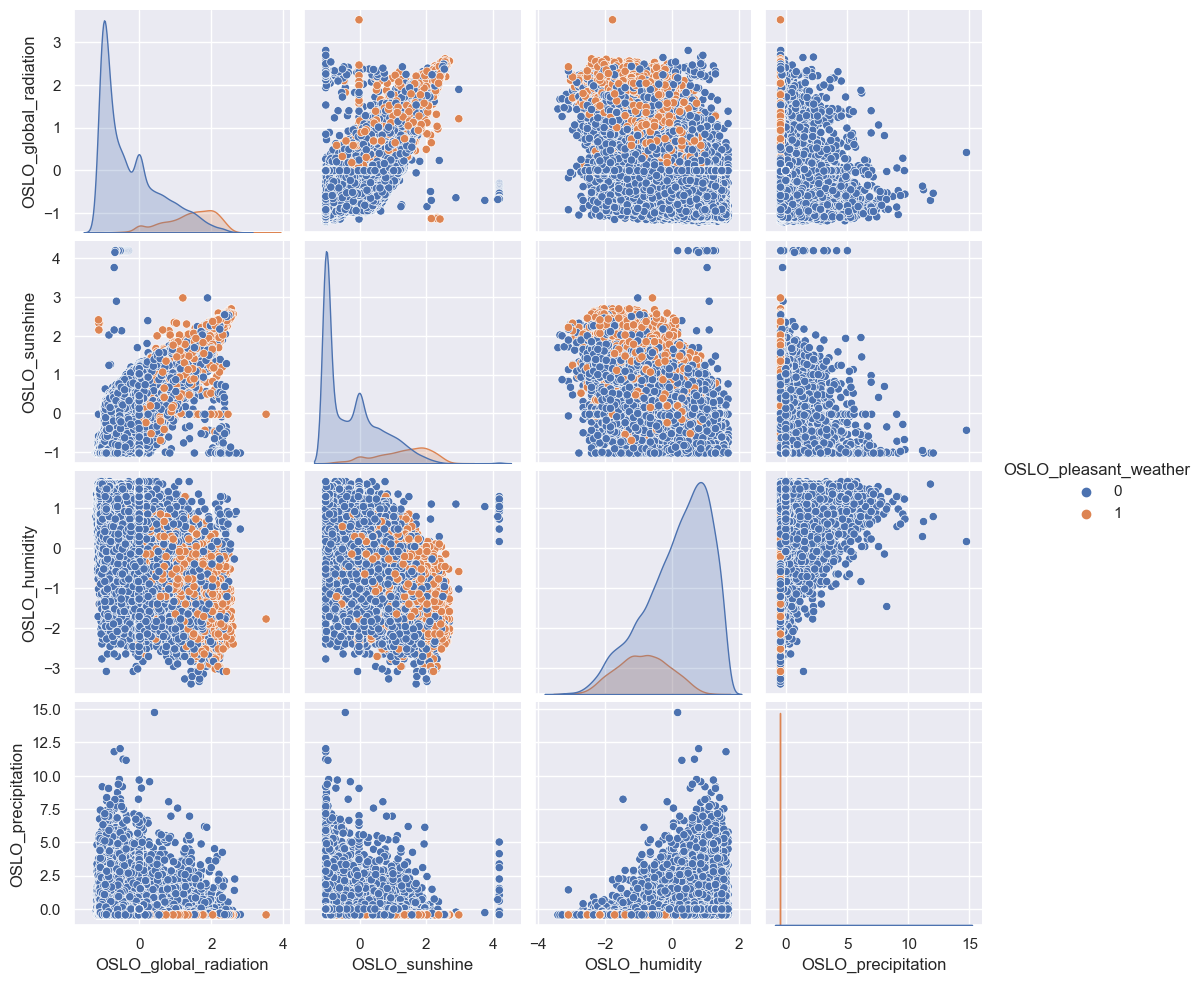

In [13]:
subset_columns = ['BUDAPEST_global_radiation', 'BUDAPEST_sunshine', 'BUDAPEST_humidity', 'BUDAPEST_precipitation',
                  'HEATHROW_global_radiation', 'HEATHROW_sunshine', 'HEATHROW_humidity', 'HEATHROW_precipitation',
                  'OSLO_global_radiation', 'OSLO_sunshine', 'OSLO_humidity', 'OSLO_precipitation',
                  'BUDAPEST_pleasant_weather', 'HEATHROW_pleasant_weather', 
                  'OSLO_pleasant_weather']

# Create pairplot for each location
for location in ['BUDAPEST', 'HEATHROW', 'OSLO']:
    location_columns = [col for col in subset_columns if location in col]
    sns.pairplot(df4[location_columns], hue=f'{location}_pleasant_weather')

## Budapest Station

In [14]:
# Create feature matrix X by dropping the unneeded columns
X = df4[['BUDAPEST_global_radiation', 'BUDAPEST_sunshine', 'BUDAPEST_humidity', 'BUDAPEST_precipitation',
                  'HEATHROW_global_radiation', 'HEATHROW_sunshine', 'HEATHROW_humidity', 'HEATHROW_precipitation',
                  'OSLO_global_radiation', 'OSLO_sunshine', 'OSLO_humidity', 'OSLO_precipitation']]

# Create target vector y
y = df4[['BUDAPEST_pleasant_weather']]

In [15]:
print(X.shape)
print(y.shape)

(22950, 12)
(22950, 1)


In [16]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 12)
(5738, 12)
(17212, 1)
(5738, 1)


In [18]:
#Run the model with neighbors equal to 1 to 5, test the accuracy
k_range = np.arange(1,5)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)

C:\Users\solom\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\solom\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\solom\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\solom\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

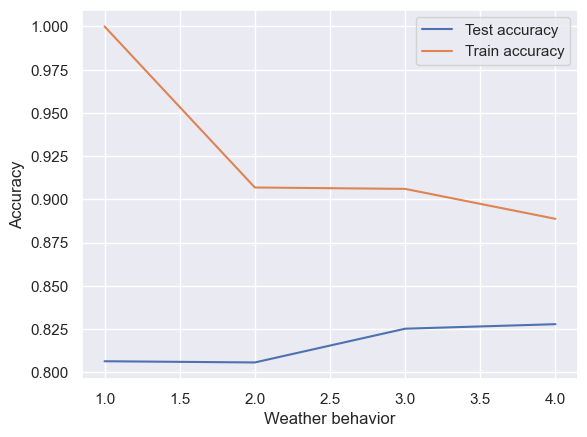

In [19]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Weather behavior')
plt.ylabel('Accuracy')
plt.show
plt.savefig(os.path.join(path,'Visualization', 'Budapest_accuracy.png'))

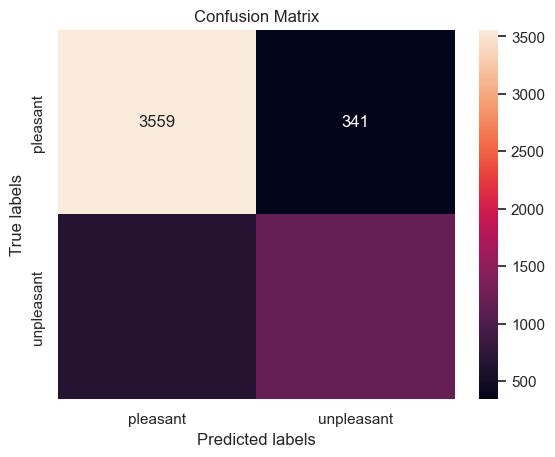

In [20]:
#Confusion matrix based on the last "k" in the sequence
labels = ['pleasant','unpleasant',]    

ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.savefig(os.path.join(path,'Visualization', 'Budapest_test.png'))

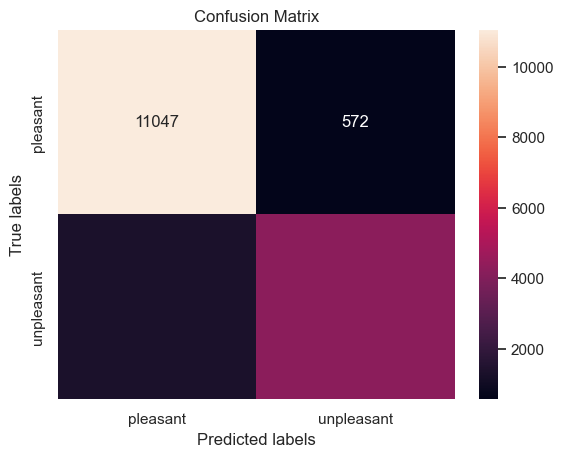

In [21]:
#Confusion matrix based on the last "k" in the sequence
labels = ['pleasant','unpleasant']    

ax= plt.subplot()

cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.savefig(os.path.join(path,'Visualization', 'Budapest_train.png'))

## Heathrow Station

In [22]:
# Create feature matrix X by dropping the unneeded columns
X = df4[['BUDAPEST_global_radiation', 'BUDAPEST_sunshine', 
                  'HEATHROW_global_radiation', 'HEATHROW_sunshine',
                  'OSLO_global_radiation', 'OSLO_sunshine']]

# Create target vector y
y = df4[['HEATHROW_pleasant_weather']]

In [23]:
print(X.shape)
print(y.shape)

(22950, 6)
(22950, 1)


In [24]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 6)
(5738, 6)
(17212, 1)
(5738, 1)


In [26]:
#Run the model with neighbors equal to 1 to 5, test the accuracy
k_range = np.arange(1,5)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)

C:\Users\solom\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\solom\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\solom\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\solom\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

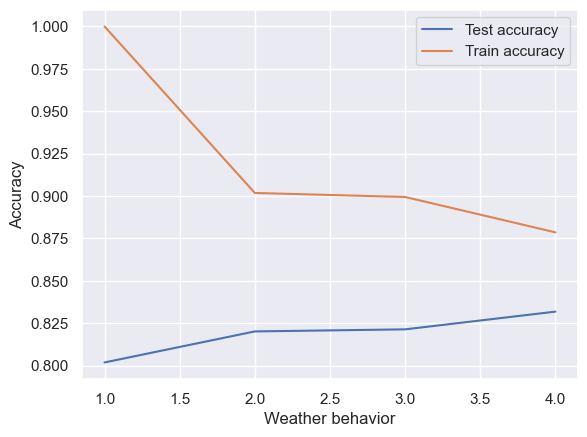

In [27]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Weather behavior')
plt.ylabel('Accuracy')
plt.show
plt.savefig(os.path.join(path,'Visualization', 'Heathrow_accuracy.png'))

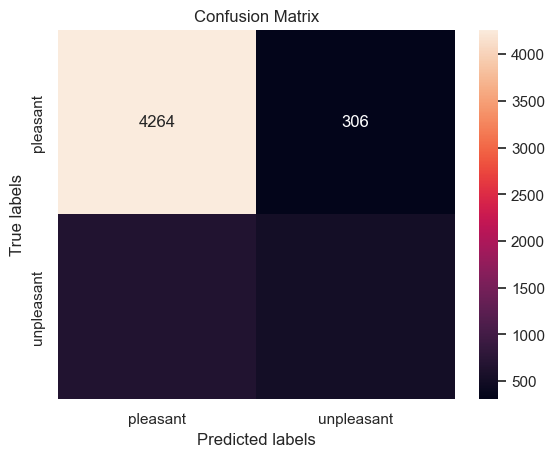

In [28]:
#Confusion matrix based on the last "k" in the sequence
labels = ['pleasant','unpleasant',]    

ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.savefig(os.path.join(path,'Visualization', 'Heathrow_test.png'))

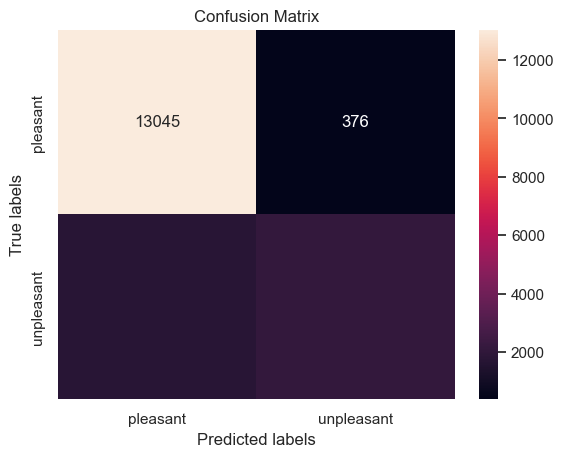

In [29]:
#Confusion matrix based on the last "k" in the sequence
labels = ['pleasant','unpleasant']    

ax= plt.subplot()

cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.savefig(os.path.join(path,'Visualization', 'Heathrow_train.png'))

## Oslo Station

In [30]:
# Create feature matrix X by dropping the unneeded columns
X = df4[['BUDAPEST_global_radiation', 'BUDAPEST_sunshine', 
                  'HEATHROW_global_radiation', 'HEATHROW_sunshine',
                  'OSLO_global_radiation', 'OSLO_sunshine']]

# Create target vector y
y = df4[['OSLO_pleasant_weather']]

In [31]:
print(X.shape)
print(y.shape)

(22950, 6)
(22950, 1)


In [32]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 6)
(5738, 6)
(17212, 1)
(5738, 1)


In [34]:
#Run the model with neighbors equal to 1 to 5, test the accuracy
k_range = np.arange(1,5)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)

C:\Users\solom\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\solom\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\solom\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\solom\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

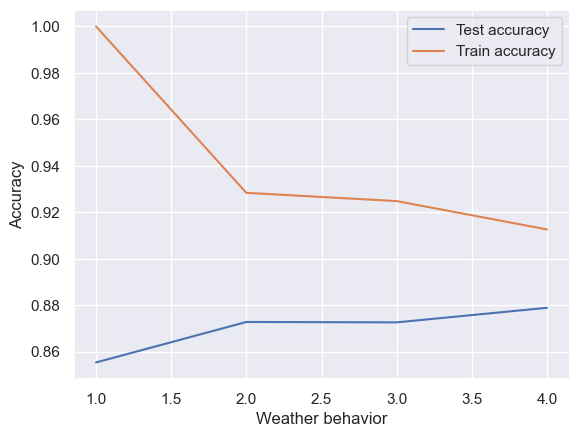

In [35]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Weather behavior')
plt.ylabel('Accuracy')
plt.show
plt.savefig(os.path.join(path,'Visualization', 'Oslo_accuracy.png'))

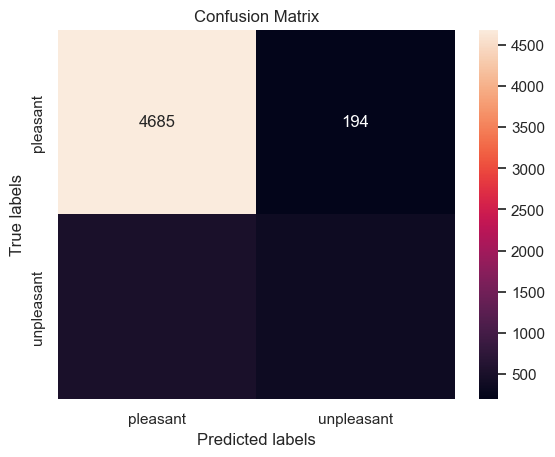

In [36]:
#Confusion matrix based on the last "k" in the sequence
labels = ['pleasant','unpleasant',]    

ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.savefig(os.path.join(path,'Visualization', 'Oslo_test.png'))

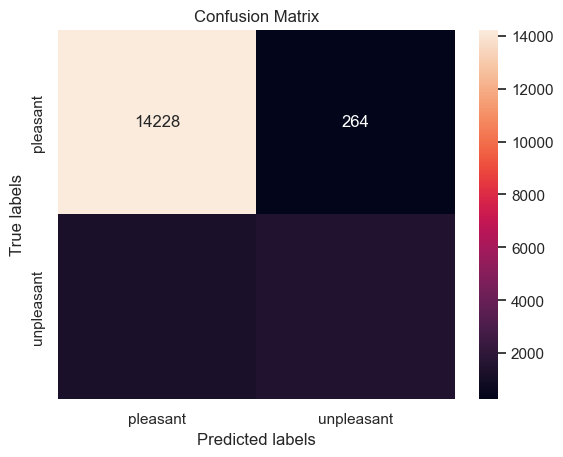

In [37]:
#Confusion matrix based on the last "k" in the sequence
labels = ['pleasant','unpleasant']    

ax= plt.subplot()

cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.savefig(os.path.join(path,'Visualization', 'Oslo_train.png'))

In [38]:
# Export dataframe as .csv
df_weather.to_csv(os.path.join(path, 'Manipulated Data', 'Weather_station_Data_Scaled.csv'))